1) EDA - Exploratory Data Analysis

Performed initial data exploration to understand the structure, features, and statistics of the dataset.
Analyzed data distributions, correlations, and patterns using descriptive statistics and visualization techniques.
Detected missing values, outliers, and anomalies and decided on appropriate handling strategies.
Identified potential data quality issues and decided on preprocessing techniques.

2) Data Preprocessing and ETL (Extract, Transform, Load):

Conducted data cleaning tasks such as handling missing values, outliers, and duplicates.
Performed feature engineering by creating new features, transforming variables, or encoding categorical variables.
Split the dataset into training and testing sets for model development and evaluation.

3) Model Selection and Training:

Selected an appropriate machine learning model based on the available data and desired outcomes.
Split the training data further into training and validation sets for model selection and hyperparameter tuning.
Trained multiple models using different algorithms.
Evaluated model performance using appropriate metrics and compared results.

4) Model Evaluation:

Analyzed model errors and misclassifications to gain insights into areas for improvement
Performed cross-validation or bootstrapping to estimate model performance robustly

6) Documentation and Reporting:

Documented the entire model building process including EDA findings, preprocessing steps, model selection criteria, and evaluation results.

When communicating with stateholders, its important to present the information in a clear and understadable manner.

Hypothetical: after seeing your work, your stakeholders come to you and say that they can collect more data, but want your guidance before starting. How would you advise them based on your EDA and model results?

1)A more accurate dataset for analysis will be provided by gathering a bigger sample size of games and player performances. With additional data, we may reduce the impact of unexpected changes and increase the generalizability of our conclusions.
2)As new data becomes available, continue to iterate on the analysis and model development. Regularly update and retrain the model to incorporate the newly collected data, as this will enhance the accuracy and relevance of the insights we derive.


Imported pandas to read the dataset from a CSV file and manipulate the data.
Numpy is used for various array operations and computatations.
Imported Train_test_split from sklearn.model_selection to split the dataset into training and testing subnets.
Imported accuracy_score from sklearn.metrics to evualate the accuracy of the model's prediction
Imported classification_report from sklearn.metrics to generate a classification report to assess the performance of the model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Uploding files from local machine to the notebook

In [2]:
from google.colab import files
uploaded = files.upload()

Saving starcraft_player_data.csv to starcraft_player_data.csv


In [3]:
import io

The code reads the contents of the uploaded 'starcraft_player_data.csv' file as a pandas DataFrame using pd.read_csv().

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['starcraft_player_data.csv']))

In [5]:
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [6]:
df.columns #return the list of column names in the Dataframe df

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

A new DataFrame named "data" is created from an existing DataFrame "df" using the code "data = pd.DataFrame(df)," thereby creating a duplicate of the original DataFrame.

In [7]:
data=pd.DataFrame(df) 

It replaces all occurrences of the string '?' in the DataFrame df with the mode (most frequent value) of each respective column.

In [8]:
data = df.replace('?', pd.Series(df.mode().iloc[0]))

In [9]:
print(data.dtypes)

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


It returns the count of unique values in the 'LeagueIndex' column of the DataFrame df, providing a frequency distribution of each value.

In [10]:
df['LeagueIndex'].value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

It removes the 'GameID' column from the DataFrame data, modifying the DataFrame in-place by dropping the specified column.

In [11]:
data.drop(['GameID'], axis=1, inplace=True)

In [12]:
#It contains the names of columns ('Age', 'HoursPerWeek', 'TotalHours') that represent numeric data in a DataFrame.
numeric_cols = ['Age', 'HoursPerWeek', 'TotalHours'] 

In [13]:
#It converts the columns specified in the `numeric_cols` list of the DataFrame data to the integer data type, updating the DataFrame with the converted values.
data[numeric_cols] = data[numeric_cols].astype(int)

In [14]:
print(data.dtypes)

LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


**Heatmap of Correaltion of features with Target Variable(LeagueIndex)**


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#It calculates the correlation between each column (except "LeagueIndex") and the "LeagueIndex" column of the DataFrame `data`, storing the correlation values in the `a_corr` Series.
a_corr = data.drop("LeagueIndex", axis=1).apply(lambda x: x.corr(data.LeagueIndex))

The code fig, ax = plt.subplots(figsize=(10, 10)) creates a figure and axes object with a specified size for the heatmap plot, and sns.heatmap(a_corr.to_frame(), annot=True, cmap='coolwarm') generates a heatmap using the correlation values in a_corr, with annotations and a coolwarm color map, which is then displayed using plt.show(), while ax.set_xlabel("data") and ax.set_ylabel("Features") set the x and y axis labels respectively.

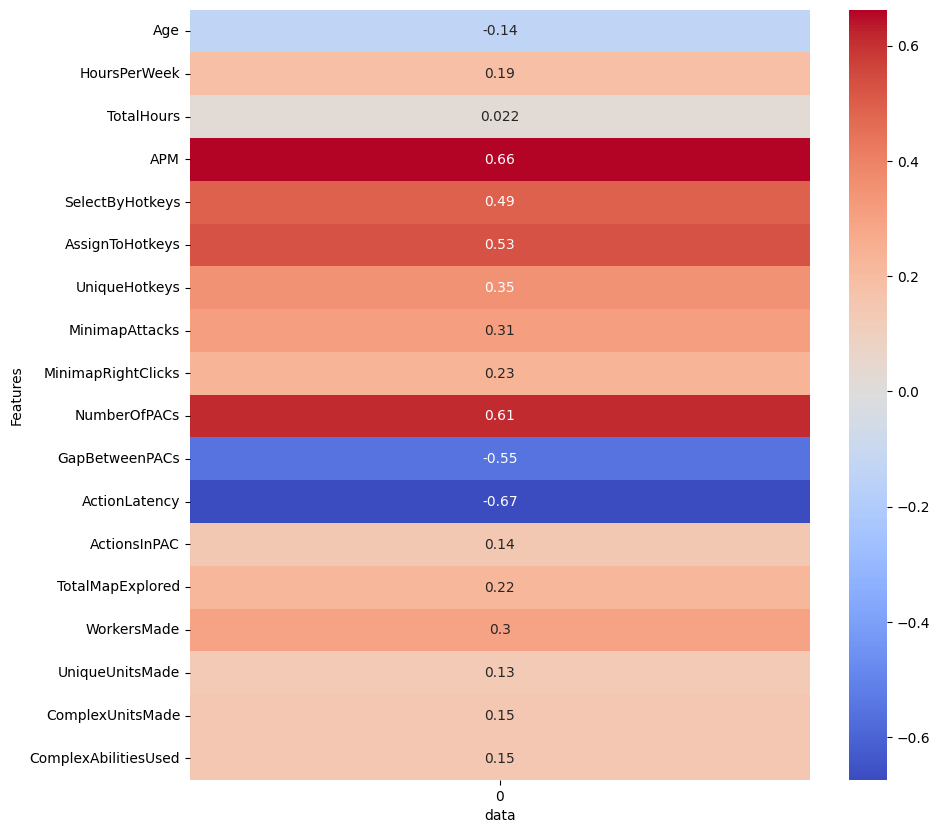

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(a_corr.to_frame(), annot=True, cmap='coolwarm')
ax.set_xlabel("data")
ax.set_ylabel("Features")
plt.show()

The code X = data.drop('LeagueIndex', axis=1) creates a new DataFrame X by dropping the 'LeagueIndex' column from the original DataFrame data, while y = data['LeagueIndex'] assigns the 'LeagueIndex' column of data to the Series y as the target variable.

In [18]:
X = data.drop('LeagueIndex', axis=1)
y = data['LeagueIndex']

The code imports the StandardScaler class from sklearn.preprocessing, defines a list of column names, initializes a StandardScaler object, and applies the standardization transformation to the specified columns in the DataFrame X, scaling the values to have zero mean and unit variance.

In [19]:
from sklearn.preprocessing import StandardScaler

columns = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])

In [20]:
X

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,1.287812,-0.489087,0.119240,0.513521,-0.148288,-0.684207,1.116679,0.069594,0.012948,1.397121,-0.448594,-1.189024,-0.349380,0.789750,0.703205,-0.287506,-0.535072,-0.534971
1,0.330116,-0.489087,0.235724,0.234613,-0.188288,-0.507399,-0.154515,1.180306,0.119380,0.850859,-0.433919,-1.112184,-0.287424,-0.017719,0.311824,-0.825886,-0.535072,0.247698
2,2.006085,-0.489087,-0.043838,-0.906582,-0.605182,-0.168988,-0.154515,1.177699,0.196244,-0.541384,0.249894,0.603835,-0.822947,-0.017719,-0.553320,-0.287506,-0.535072,0.176773
3,-0.627580,0.352244,-0.032190,-0.181859,-0.617967,-0.713535,-1.425710,-0.271524,0.413780,0.322194,-0.649597,-0.520076,-0.239184,-0.421454,-1.166793,0.250874,-0.535072,0.911366
4,2.484933,-0.489087,-0.026366,0.112517,-0.598573,-0.205646,-1.001978,-0.592757,2.496707,-1.103252,-1.030437,-0.086198,2.743858,-0.959766,0.275210,-1.364267,-0.535072,-0.462371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,-0.388156,-0.489087,-0.026366,2.745266,3.052181,1.642434,1.964142,3.152651,-0.640093,1.100957,-1.268475,-1.086773,0.670682,3.212157,-0.298200,-0.825886,-0.535072,-0.534971
3391,-0.388156,-0.489087,-0.026366,3.805006,4.493954,3.484223,2.387873,0.891798,1.846105,0.802823,-1.519398,-1.436044,1.286961,-0.825188,-0.469841,-1.364267,-0.535072,-0.534971
3392,-0.388156,-0.489087,-0.026366,3.511543,4.550331,2.163798,1.116679,1.444918,-0.579568,0.984166,-1.630149,-1.259293,0.752643,-0.421454,0.439201,-1.364267,-0.535072,-0.534971
3393,-0.388156,-0.489087,-0.026366,4.983273,6.082393,0.981276,0.269216,0.638976,1.041363,0.889665,-1.671651,-1.501593,1.798798,-0.959766,-0.807130,-0.287506,-0.535072,1.845841


In [21]:
X_select =pd.DataFrame(X)

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_select, y)


# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

In [23]:
selected_feature_names

Index(['HoursPerWeek', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'GapBetweenPACs',
       'ActionLatency', 'WorkersMade'],
      dtype='object')

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

In [25]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

Imported various classification models like LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, GaussianNB, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier and the classification_report metric from sklearn.metrics allowing for the evaluation and comparison of different models for classification tasks.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [27]:
#It returns the count of each unique value in the Series y, providing a frequency distribution of the target variable values.
y.value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

In [28]:
y_resampled.value_counts()

5    811
4    811
3    811
2    811
1    811
7    811
6    811
8    811
Name: LeagueIndex, dtype: int64

**Random Forest Model for Predicting datad or not using Scikit Learn**

In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print(f"{type(model).__name__} classification report:\n{report}\n")

RandomForestClassifier classification report:
              precision    recall  f1-score   support

           1       0.82      0.87      0.85       175
           2       0.68      0.77      0.72       155
           3       0.59      0.64      0.62       153
           4       0.43      0.26      0.32       173
           5       0.37      0.34      0.35       155
           6       0.59      0.69      0.64       156
           7       0.95      0.99      0.97       153
           8       0.99      0.99      0.99       178

    accuracy                           0.70      1298
   macro avg       0.68      0.70      0.68      1298
weighted avg       0.68      0.70      0.69      1298




**Support Vector Machine Model for Predicting datad or not using Scikit Learn**

In [31]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print(f"{type(model).__name__} classification report:\n{report}\n")

SVC classification report:
              precision    recall  f1-score   support

           1       0.64      0.70      0.66       175
           2       0.41      0.42      0.41       155
           3       0.32      0.32      0.32       153
           4       0.31      0.24      0.27       173
           5       0.34      0.32      0.33       155
           6       0.52      0.54      0.53       156
           7       0.83      0.96      0.89       153
           8       0.97      0.97      0.97       178

    accuracy                           0.56      1298
   macro avg       0.54      0.56      0.55      1298
weighted avg       0.55      0.56      0.55      1298




**Gradient Boosting Model for Predicting datad or not using Scikit Learn**

In [32]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print(f"{type(model).__name__} classification report:\n{report}\n")

GradientBoostingClassifier classification report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70       175
           2       0.51      0.58      0.55       155
           3       0.39      0.36      0.37       153
           4       0.38      0.31      0.34       173
           5       0.31      0.29      0.30       155
           6       0.51      0.60      0.55       156
           7       0.93      0.98      0.95       153
           8       0.98      0.98      0.98       178

    accuracy                           0.60      1298
   macro avg       0.59      0.60      0.59      1298
weighted avg       0.60      0.60      0.60      1298




**Bagging Classifier Model for Predicting datad or not using Scikit Learn**

In [35]:
model = BaggingClassifier(RandomForestClassifier(),n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print(f"{type(model).__name__} classification report:\n{report}\n")

BaggingClassifier classification report:
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       175
           2       0.68      0.72      0.70       155
           3       0.55      0.59      0.57       153
           4       0.46      0.29      0.36       173
           5       0.33      0.28      0.30       155
           6       0.57      0.69      0.62       156
           7       0.93      0.99      0.96       153
           8       0.99      0.99      0.99       178

    accuracy                           0.68      1298
   macro avg       0.66      0.68      0.67      1298
weighted avg       0.67      0.68      0.67      1298




**Ensemble Voting Model for Predicting datad or not using Scikit Learn**

In [36]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
model = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
print(f"{type(model).__name__} classification report:\n{report}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier classification report:
              precision    recall  f1-score   support

           1       0.63      0.77      0.69       175
           2       0.43      0.47      0.45       155
           3       0.41      0.35      0.38       153
           4       0.33      0.27      0.30       173
           5       0.34      0.29      0.31       155
           6       0.45      0.47      0.46       156
           7       0.80      0.88      0.84       153
           8       0.99      0.99      0.99       178

    accuracy                           0.57      1298
   macro avg       0.55      0.56      0.55      1298
weighted avg       0.55      0.57      0.56      1298


